In [34]:
################### for world merge feature ###############

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#data_dir = "../Data/Complete_Merged_Feature/feature_impute.txt"
data_dir = "../Data/Consumption/world_bank_impute.csv"
#data_dir = "../Data/Consumption/world_bank_merge.csv"

In [35]:
# 267 countries, and 615 features for consumption

csp_ = pd.read_csv(data_dir)
csp_ = csp_.fillna(0)
csp = csp_.values[:,1:]

In [36]:
csp_.shape

(263, 1171)

In [37]:
from sklearn.decomposition import PCA
#data = np.loadtxt(data_dir)
#csp = data[:,27:]

pca = PCA(n_components = 100)
pca.fit(csp)
#Y = pca.transform(csp)
Y = csp
#np.savetxt("../Data/Consumption/Consumption_PCA_feature.txt",Y[:,:7])

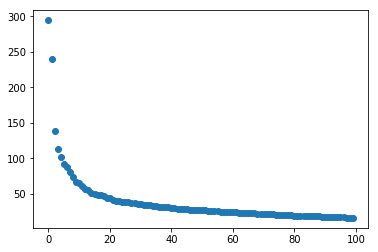

In [38]:
plt.scatter(np.arange(100),pca.singular_values_)

In [39]:
# data_dir = "../Data/Complete_Merged_Feature/feature_merge.csv"
# cols = pd.read_csv(data_dir).columns[28:]
rows = csp_["country_code"]
data_dir = "../Data/Consumption/consumption_country.txt"
with open(data_dir) as f:
    developing = f.read().splitlines()

cols = csp_.columns[1:]

In [28]:
data = {'items':cols, 'comp':pca.components_[5]}

pd.DataFrame.from_dict(data).sort_values(by=['comp']).head(10)

,items,comp
193,Gross value added at basic prices (GVA) (curre...,-0.366536
571,Broad money (current LCU),-0.237906
171,Gross domestic savings (current LCU),-0.180900
218,"Industry (including construction), value added...",-0.150361
192,Gross value added at basic prices (GVA) (const...,-0.137392
167,Gross capital formation (current LCU),-0.127976
219,"Industry (including construction), value added...",-0.120871
246,Net secondary income (Net current transfers fr...,-0.109905
80,Changes in inventories (current LCU),-0.094588
103,External balance on goods and services (consta...,-0.091944


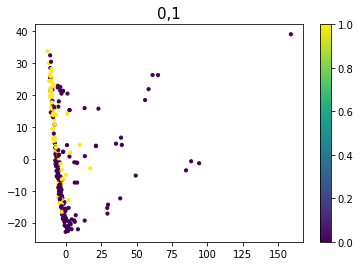

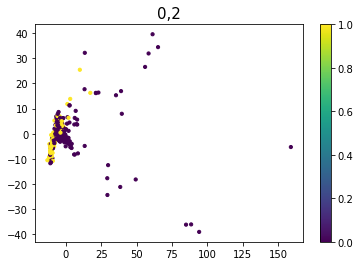

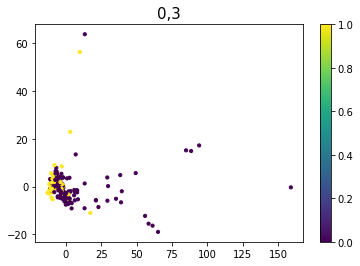

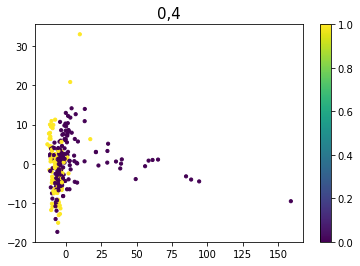

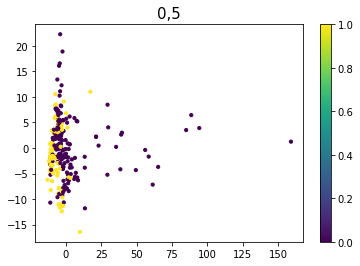

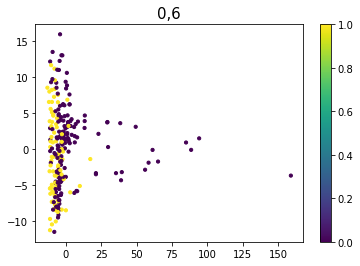

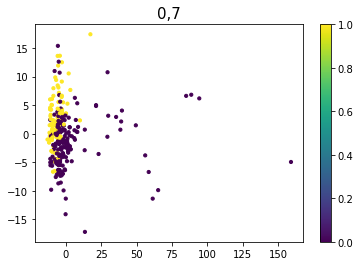

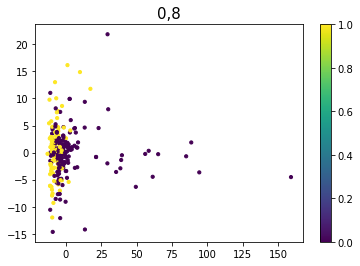

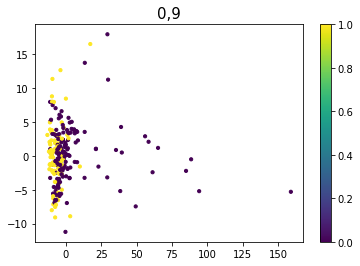

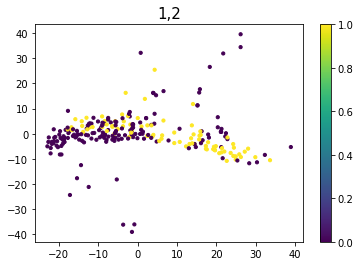

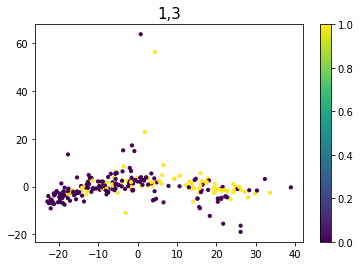

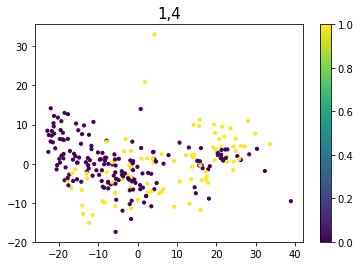

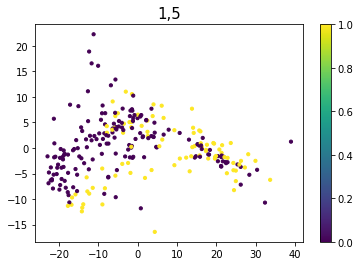

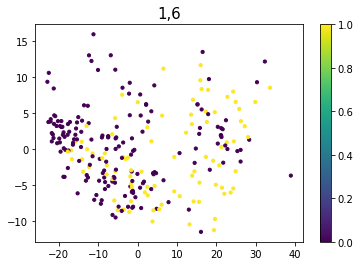

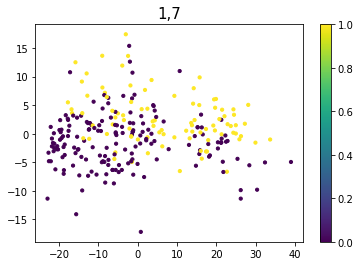

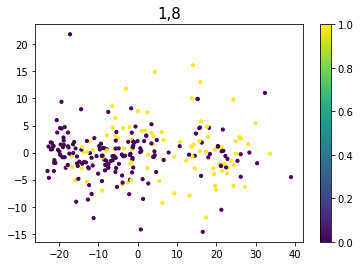

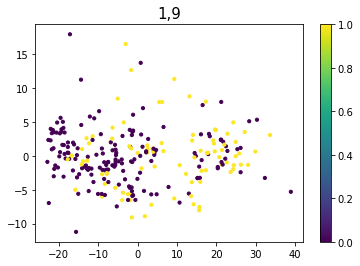

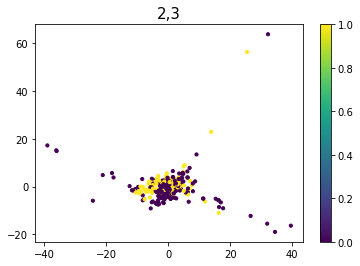

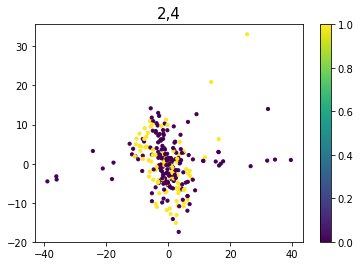

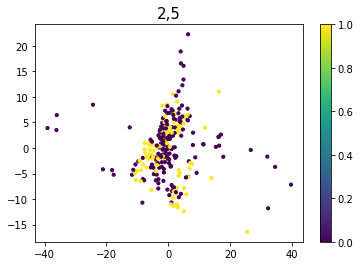

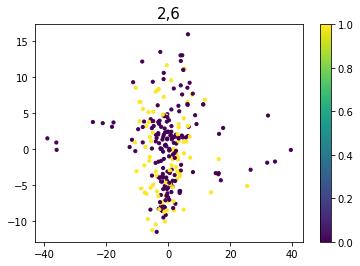

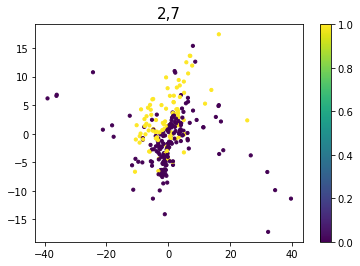

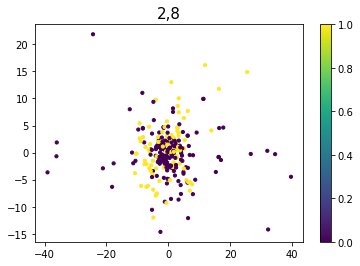

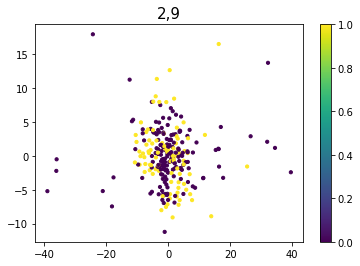

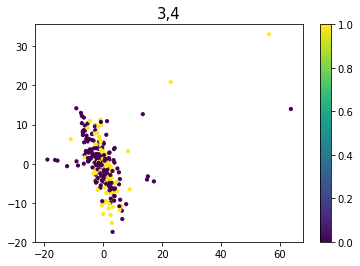

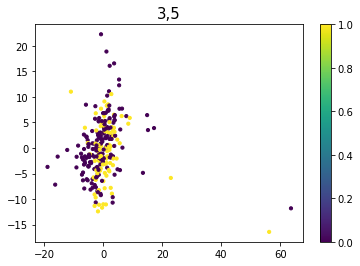

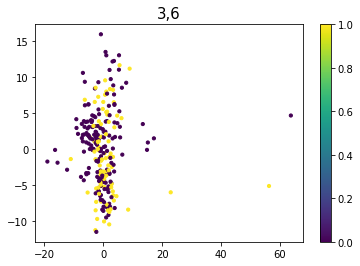

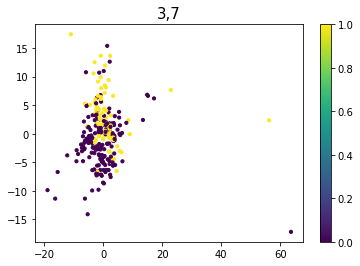

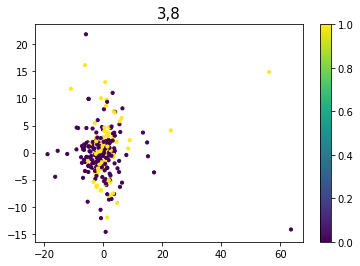

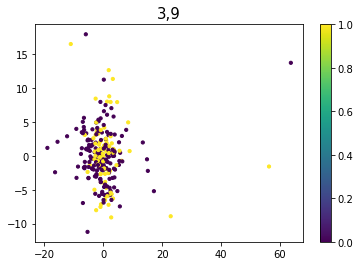

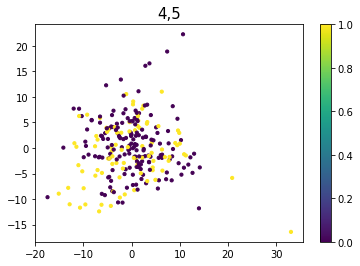

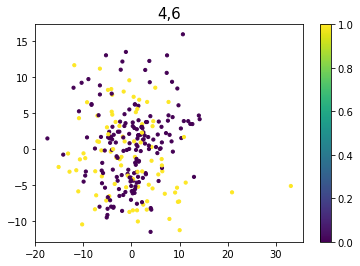

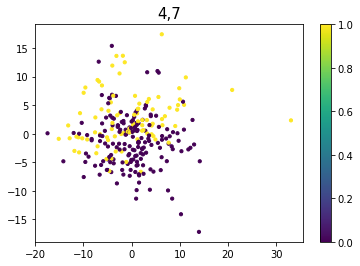

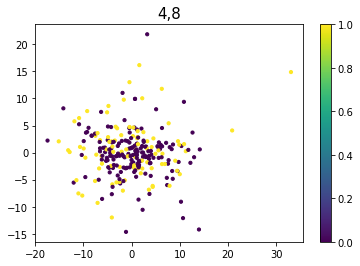

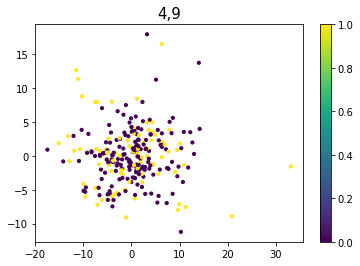

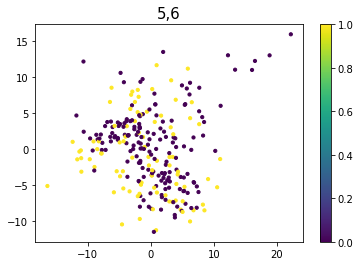

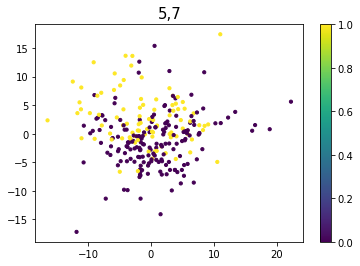

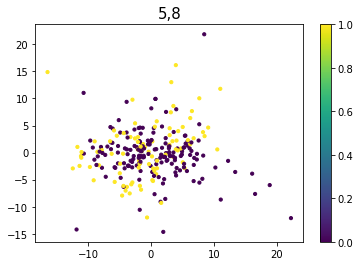

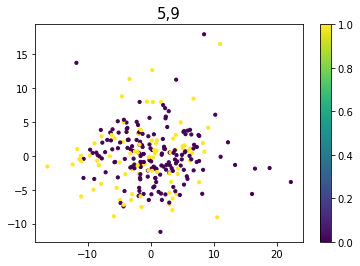

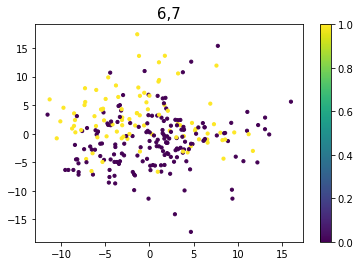

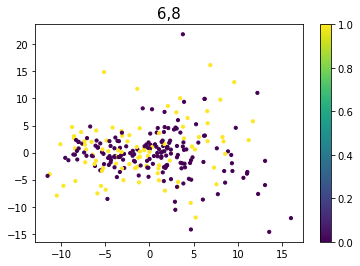

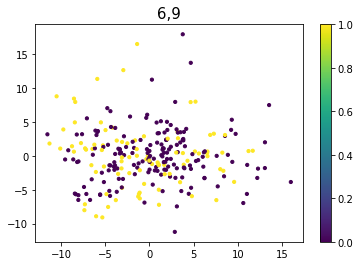

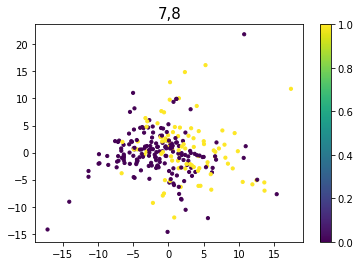

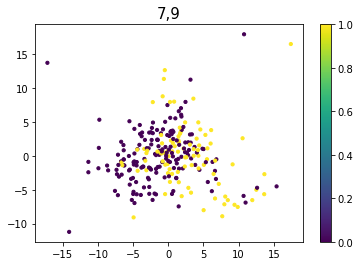

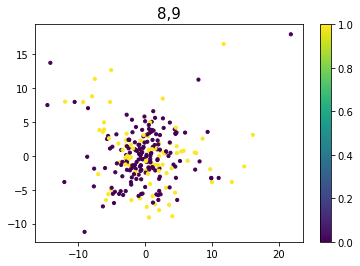

In [255]:
for i in range(10):
    for j in range(i+1,10):
        plt.scatter(Y[:,i],Y[:,j],c=[rows[i] in developing for i in range(len(rows))],s=10,alpha=1) # Yellow is developing, Purple is developed
        plt.title(str(i)+","+str(j),fontsize=15)
        plt.colorbar()
        plt.show()

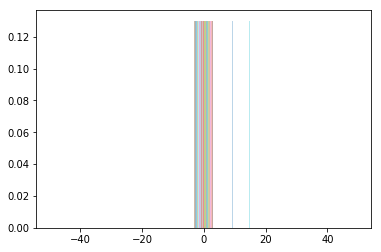

In [382]:
beta = -2
gamma = 3
Y_ing = Y[[rows[i] in developing for i in range(len(rows))]]
Y_ed = Y[[rows[i] not in developing for i in range(len(rows))]]
plt.hist(Y_ing[:,1]+beta*Y_ing[:,5]+gamma*Y_ing[:,3],alpha=0.3,range=(-50,50),bins=13,density=True);
plt.hist(Y_ed[:,1]+beta*Y_ed[:,5]+gamma*Y_ed[:,3],alpha=0.3,range=(-50,50),bins=13,density=True);

In [40]:
Y_ing = Y[[rows[i] in developing for i in range(len(rows))]]
Y_ed = Y[[rows[i] not in developing for i in range(len(rows))]]

In [41]:
import numpy as np
X = np.concatenate((Y_ed,Y_ing),axis=0)
y = np.concatenate((np.zeros(Y_ed.shape[0]),np.ones(Y_ing.shape[0])))
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
clf.score(X,y)

1.0

In [43]:
f_w = clf.coef_[0]
score_ed = np.mean(Y_ed*f_w,axis=1)
score_ing = np.mean(Y_ing*f_w,axis=1)

(array([  1.,   0.,   0.,   1.,   2.,   5.,   4.,  14.,  37., 109.]),
 array([-0.01323056, -0.01187344, -0.01051632, -0.0091592 , -0.00780208,
        -0.00644496, -0.00508784, -0.00373072, -0.0023736 , -0.00101648,
         0.00034064]),
 <a list of 10 Patch objects>)

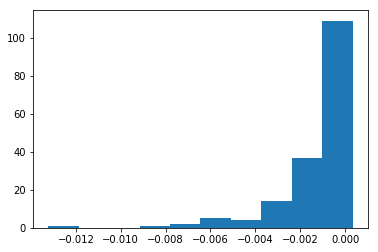

In [24]:
array = [1,2,3,2,4,2,4]
plt.hist(list(score_ed))

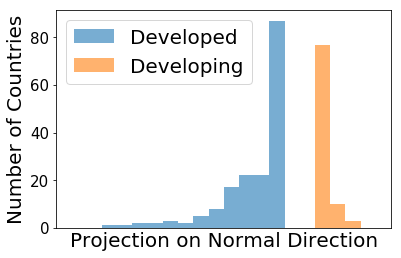

In [44]:
plt.hist(list(score_ed),bins=20,range=(-0.01,0.005),alpha=0.6)
plt.hist(list(score_ing),bins=20,range=(-0.01,0.005),alpha=0.6);
#plt.xticks([-0.2,-0.1,0.0,0.1,0.2],fontsize=15);
#plt.yticks(fontsize=15)
plt.legend(["Developed","Developing"],fontsize=20)
plt.xticks([])
plt.xlabel("Projection on Normal Direction",fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Number of Countries",fontsize=20)
plt.savefig("../../pic/svm_complete.pdf")

In [37]:
clf.coef_[0]

(1170,)

In [36]:
csp_.columns[1:]

(1170,)

In [46]:
dic = {"coef":-clf.coef_[0],"item":csp_.columns[1:]}
sv_inter = pd.DataFrame.from_dict(dic).sort_values(by=['coef'])

In [54]:
pd.set_option('display.max_colwidth', -1)
sv_inter.head(40)

,coef,item
662,-0.138315,Mothers are guaranteed an equivalent position after maternity leave (1=yes; 0=no)
650,-0.127186,Law mandates nondiscrimination based on gender in hiring (1=yes; 0=no)
485,-0.097749,Time required to get electricity (days)
387,-0.089006,"Pupil-teacher ratio, upper secondary"
951,-0.088780,Coverage of social protection and labor programs (% of population)
646,-0.078858,Firms with female top manager (% of firms)
424,-0.077583,"Secondary education, vocational pupils (% female)"
583,-0.076636,Depth of credit information index (0=low to 8=high)
530,-0.076595,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"
1117,-0.076181,Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports)


KeyboardInterrupt: 

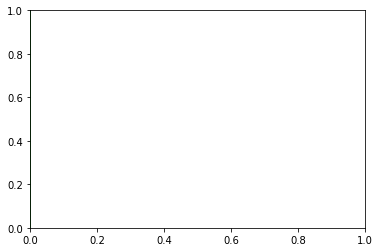

In [10]:
plt.hist(score_ed,bins=50,range=(-0.2,0.2))
plt.hist(score_ing,bins=50,range=(-0.2,0.2));
plt.xticks([-0.2,-0.1,0.0,0.1,0.2],fontsize=15);
plt.yticks(fontsize=15)
plt.legend(["developed","developing"],fontsize=15)

In [379]:
clf.coef_[0].shape

(100,)

In [372]:
csp_.columns[1:].shape

(1170,)

In [338]:
clf.support_vectors_[:]

array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

In [ ]:
data = {'items':cols, 'comp':pca2.components_[0]+beta*pca2.components_[1]}

pd.DataFrame.from_dict(data).sort_values(by=['comp']).head(5)

In [100]:
['THA','THA'] in developing

False

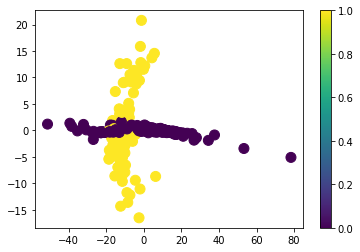

In [144]:
plt.scatter(Y[:,0],Y[:,1],c=[rows[i] in developing for i in range(len(rows))],s=100,alpha=1)
plt.colorbar()

In [114]:
deing = csp[[rows[i] in developing for i in range(len(rows))]]
deed = csp[[rows[i] not in developing for i in range(len(rows))]]


In [136]:
pca2 = PCA(n_components=50)
pca2.fit(deing)
Y_ed = pca2.transform(deed)
Y_ing = pca2.transform(deing)

In [137]:
pca2.singular_values_.shape

(50,)

In [183]:
sv = pca2.singular_values_
lens = sv.shape[0]
inte = np.linspace(sv[0],sv[-1],num=lens)
np.argmax(inte-sv)

9

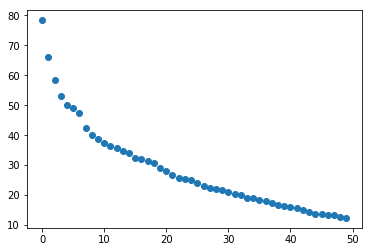

In [184]:
plt.scatter(np.arange(50), pca2.singular_values_)

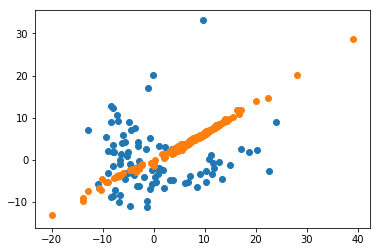

In [145]:
plt.scatter(Y_ing[:,0],Y_ing[:,1])
plt.scatter(Y_ed[:,0],Y_ed[:,1])

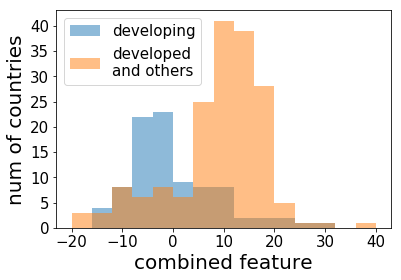

In [199]:
beta = 0.5
plt.hist(Y_ing[:,0]+beta*Y_ing[:,1],range=(-20,40),bins=15,alpha=0.5)
plt.hist(Y_ed[:,0]+beta*Y_ed[:,1],range=(-20,40),bins=15,alpha=0.5);
plt.legend(["developing","developed\nand others"],fontsize=15)
plt.xlabel("combined feature",fontsize=20)
plt.ylabel("num of countries",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("../Data/Consumption/Consumption_combine_feature.pdf",bbox_inches="tight")

In [201]:
data = {'items':cols, 'comp':pca2.components_[0]+beta*pca2.components_[1]}

pd.DataFrame.from_dict(data).sort_values(by=['comp']).head(5)

,items,comp
121,"National,Low,Water Utility",-0.052163
333,"Rural,Lowest,Clothing Material, Other Articles...",-0.051485
210,"Rural,All,Clothing Material, Other Articles of...",-0.050159
555,"Urban,Lowest,Medical Services",-0.050105
292,"Rural,Low,Clothing Material, Other Articles of...",-0.049966


In [87]:
np.mean(pca.mean_/pca.components_[0])

9.85930422025202

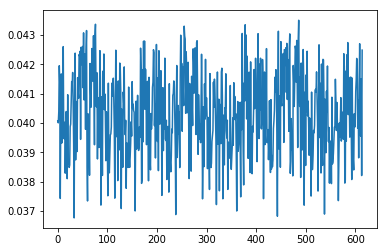

In [88]:
plt.plot(pca.components_[0])